In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [34]:
data_dogs = pd.read_csv('../projekt_utulky/fixed_data_shelter_dogs.csv',delimiter=';')

data = data_dogs[['status','detailed_description']]

data.head()

,status,detailed_description
0,NaN,Fotogalerie EOL Přijďte vyvenčit tohoto pejska...
1,NaN,NaN
2,vrácen majiteli,NaN
3,vrácena majiteli,NaN
4,našel domov,18.8.2014 NAŠEL DOMOV V DUŠNÍKÁCH U ROUDNICE N...


In [35]:
data.loc[:, 'status'] = data.loc[:, 'status'].replace({
    'našel domov': 'Našel domov',
    'našla domov': 'Našel domov',
    'vrácen majiteli': 'Vrácen majiteli',
    'vrácena majiteli': 'Vrácen majiteli',
    'zemřel': 'Zemřel',
    'zemřela': 'Zemřel'
}).fillna('Neuvedeno')

unique_statuses = ['Našel domov', 'Vrácen majiteli', 'Zemřel', 'Neuvedeno']

data.loc[: ,'status'] = data['status'].where(data.loc[:, 'status'].isin(unique_statuses), 'Neuvedeno')


In [39]:
data.loc[:, 'description_length'] = data.loc[:, 'detailed_description'].str.len().fillna(0).astype(int)

average_length_status = data.groupby('status')['description_length'].mean().reset_index()

average_length_status

,status,description_length
0,Našel domov,689.841742
1,Neuvedeno,1028.096413
2,Vrácen majiteli,303.649023
3,Zemřel,746.982781


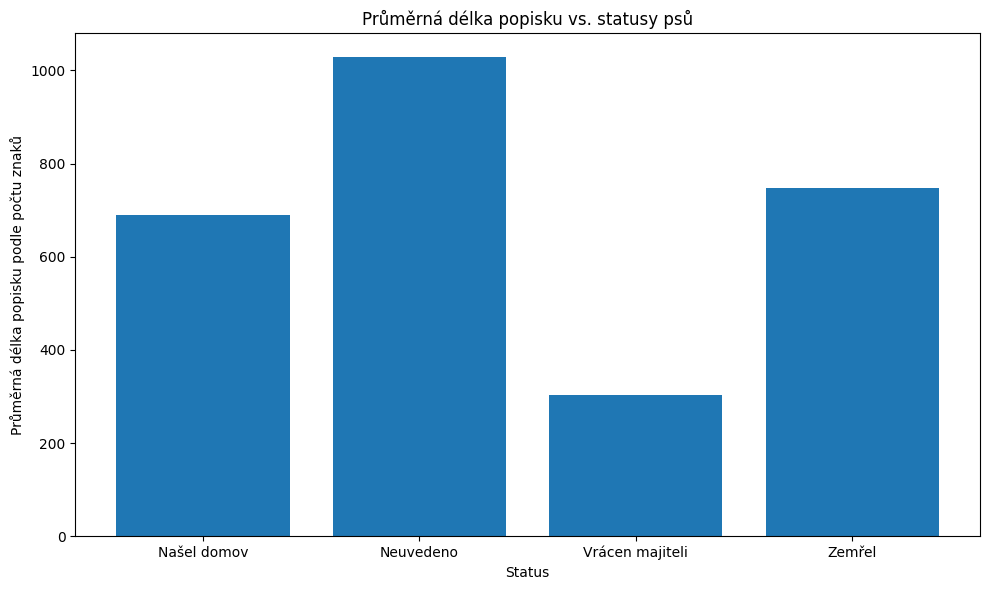

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(average_length_status['status'], average_length_status['description_length'])
plt.title('Průměrná délka popisku vs. statusy psů')
plt.xlabel('Status')
plt.ylabel('Průměrná délka popisku podle počtu znaků')
plt.tight_layout()
plt.show()


In [40]:
label_encoder = LabelEncoder()
data.loc[:, 'status_encoded'] = label_encoder.fit_transform(data.loc[:, 'status'])

correlation = data.loc[:, ['status_encoded', 'description_length']].corr().iloc[0, 1]
correlation

np.float64(-0.05093101656261426)